In [1]:
import pdb
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

data retrieved from: 

https://fred.stlouisfed.org/series/NCBEMVQ027S

_Board of Governors of the Federal Reserve System (US), Nonfinancial corporate business; real estate at market value, Level [NCBEMVQ027S], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/NCBEMVQ027S, September 13, 2019._

In [2]:
# real estate at market value
# https://fred.stlouisfed.org/series/NCBEMVQ027S
df_re = pd.read_csv("data/NCBEMVQ027S.csv") 

# total financial assets
# https://fred.stlouisfed.org/series/NCBTFTA027N
df_tfa =  pd.read_csv("data/NCBTFTA027N.csv") 

# Disposable Income (net savings)
# https://fred.stlouisfed.org/series/NCBINSQ027S
df_di =  pd.read_csv("data/disposable_income.csv") 

# Net Worth
# https://fred.stlouisfed.org/series/NCBIMTQ027S
df_nw =  pd.read_csv("data/net_worth.csv") 

# convert to datetime
df_re.date = pd.to_datetime(df_re.date)
df_tfa.date = pd.to_datetime(df_tfa.date)
df_di.date = pd.to_datetime(df_di.date)
df_nw.date = pd.to_datetime(df_nw.date)

# merge dfs
merged = df_re.merge(df_tfa, on='date', how="outer")\
.merge(df_di, on="date", how="outer")\
.merge(df_nw, on='date', how='outer')

# set date as index
merged.set_index('date', inplace=True)

merged = merged["1980": "2019"]

In [3]:
for column in merged.columns:
    merged[column] = merged[column].astype(np.float64)

In [4]:
final = merged.resample('Y').mean()

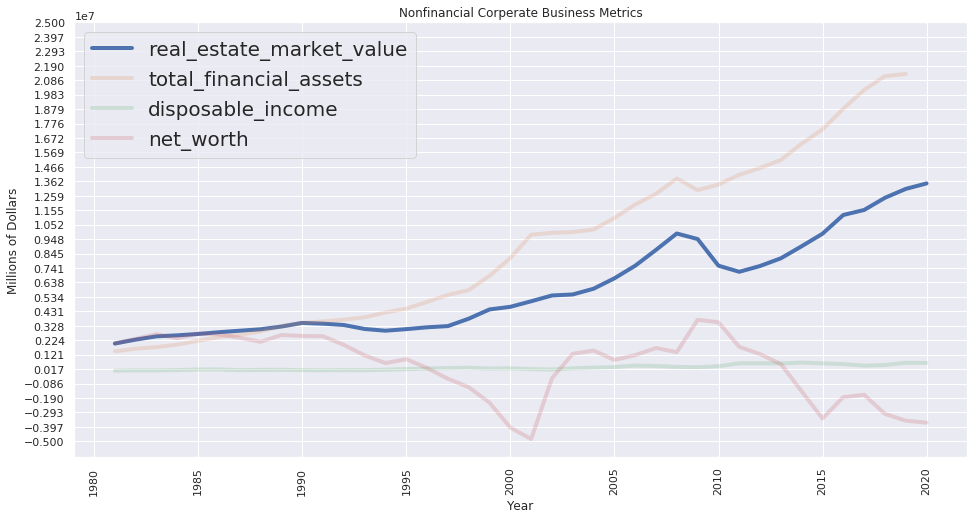

In [24]:
fig = plt.figure(figsize=(16,8))
fig.add_subplot(111)

for column in final.columns:
    alpha = 1.0 if column == 'real_estate_market_value' else 0.2
    sns.lineplot(data=final, x=final.index, y=column, linewidth=4, alpha=alpha)

plt.title("Nonfinancial Corperate Business Metrics")
plt.ylabel("Millions of Dollars")
plt.xlabel("Year")

plt.yticks(np.linspace(-5_000_000, 25_000_000, 30))
plt.xticks(rotation="vertical")
plt.legend(final.columns, fontsize=20)
plt.show()